In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# максимум столбцов при выводе
pd.options.display.max_columns = 1000
data = pd.read_excel('dataset.xlsx')

# удаление дубликатов
cols = data.columns.delete(0)
data.loc[data.duplicated(subset=cols)]
data = data.drop_duplicates(subset=cols)

# делаем название столбцов с заглавной буквы
data.columns.array[0:10] = pd.Index(map(str.title, data.columns.array[0:10]))

In [311]:
# удаляем столбцы, в которых нет значений
data.dropna( how='all', axis=1, inplace = True)
# удаляем столбец без названия
del data['Unnamed: 31']

In [312]:
# исправляем ошибки ввода данных 
data['ВИЧ-инфекция'] = data['ВИЧ-инфекция'].replace('да (ст IV Б)', 'да (IV Б стадия)')
data['ВИЧ-инфекция'] = data['ВИЧ-инфекция'].replace('да (ст V)', 'да (V стадия)')
data['ВИЧ-инфекция'] = data['ВИЧ-инфекция'].replace('да (ст IV В)', 'да (IV В стадия)')
data['ВИЧ-инфекция'].value_counts()

data['Курение стаж'] = data['Курение стаж'].replace('да', None)

# пустые клетки заменяем на "неизвестно "
data = data.fillna('неизвестно')

In [313]:
therapy_completed = data[data['Лечение прервано'] == 'По согласованию с врачом']
therapy_not_completed = data[data['Лечение прервано'] != 'По согласованию с врачом']
refused = data[data['Лечение прервано'] == 'да/отказ']
leave = data[data['Лечение прервано'] == 'да/самовольный уход']

data['Лечение прервано'].value_counts()


неизвестно                         252
да/самовольный уход                141
да/нарушение режима                 26
да/отказ                            15
да/переведен в другой стационар     11
По согласованию с врачом             5
Name: Лечение прервано, dtype: int64

In [314]:
womens = data[data['Пол'] == 'ж'].get(['Номер', 'Пол'])
mens = data[data['Пол'] == 'м'].get(['Номер', 'Пол'])

In [315]:

# max_day_therapy = data[data['К/Дней'] == max(data['К/Дней'])] ??????????????????
max_day_therapy = data[data['К/Дней'] == max(data['К/Дней'])].get(['Номер', 'К/Дней'])
min_day_therapy = data[data['К/Дней'] == min(data['К/Дней'])].get(['Номер', 'К/Дней'])


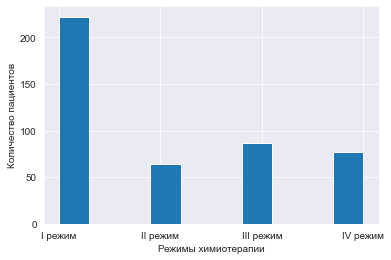

In [316]:
plt.hist(data['Режимы химиотерапии'])
plt.xlabel('Режимы химиотерапии')
plt.ylabel('Количество пациентов')
plt.show()

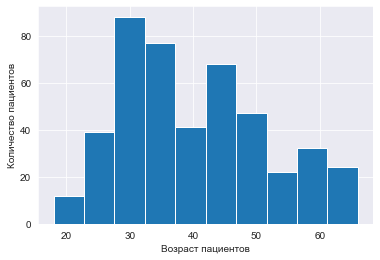

In [317]:
# гистограмма по возрасту
plt.hist(data['Возраст'])
plt.xlabel('Возраст пациентов')
plt.ylabel('Количество пациентов')
plt.show()